In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def oversample(df):
        output_name = df.columns[-1]

        classes_counts = [(c, sum(df.iloc[:, -1] == c))
                    for c in df.iloc[:, -1].unique()]
        classes_counts.sort(key=lambda x: x[1])

        max_cnt = classes_counts[-1][-1]

        for cls, cnt in classes_counts:
            if cnt == max_cnt:
                continue
            
            tmp = df[df[output_name] == cls].copy()

            tdf = pd.DataFrame()
            for _ in range(max_cnt // cnt - 1):
                tdf = pd.concat([tdf, tmp.copy()], ignore_index=True)
            tdf = pd.concat([tdf, tmp.iloc[:(max_cnt - cnt - len(tdf))]], ignore_index=True)

            df = pd.concat([df, tdf], ignore_index=True)
        
        # unique_rows_with_zero = df[df[output_name] == 0].drop_duplicates().shape[0]
        # print(f"Number of unique rows with 0 in the last column: {unique_rows_with_zero}")
        # unique_rows_with_one = df[df[output_name] == 1].drop_duplicates().shape[0]
        # print(f"Number of unique rows with 1 in the last column: {unique_rows_with_one}")
        # print(df[output_name].value_counts())
        
        df = df.sample(frac=1, random_state=42)

        return df

In [37]:
df = pd.read_csv('./report/NO_OS/histology/data.csv')
df_os = oversample(df)
len(df), len(df_os)

(696, 1482)

Histology
1    494
2    158
0     44
Name: count, dtype: int64


Text(0.5, 1.0, 'Class frequency')

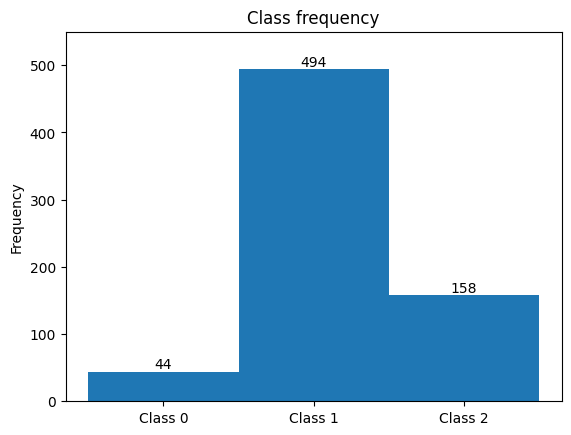

In [42]:
last_column = df.iloc[:, -1]
print(last_column.value_counts())

# Specify the custom labels for the bin centers
custom_labels = ['Class 0', 'Class 1', 'Class 2']
num_bins = len(custom_labels)

hist_values, bin_edges, _ = plt.hist(last_column, bins=num_bins)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]

for i, value in enumerate(hist_values):
    plt.annotate(str(int(value)), xy=(bin_centers[i], value), ha='center', va='bottom')

plt.xticks(bin_centers, custom_labels)

plt.ylabel('Frequency')
plt.ylim(top=550)
plt.title('Class frequency')

Histology
1    494
0    494
2    494
Name: count, dtype: int64


Text(0.5, 1.0, 'Class frequency')

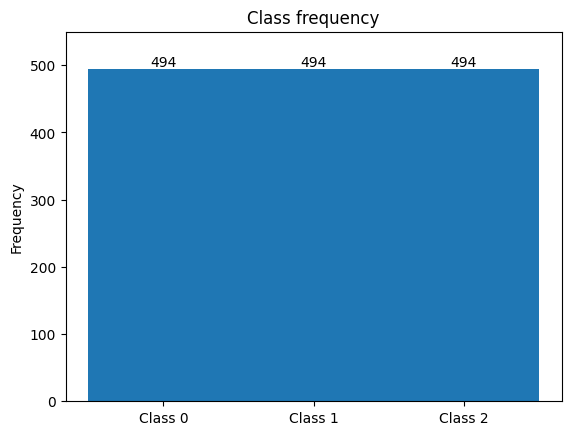

In [43]:
last_column = df_os.iloc[:, -1]
print(last_column.value_counts())

# Specify the custom labels for the bin centers
custom_labels = ['Class 0', 'Class 1', 'Class 2']
num_bins = len(custom_labels)

hist_values, bin_edges, _ = plt.hist(last_column, bins=num_bins)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]

for i, value in enumerate(hist_values):
    plt.annotate(str(int(value)), xy=(bin_centers[i], value), ha='center', va='bottom')

plt.xticks(bin_centers, custom_labels)

plt.ylabel('Frequency')
plt.ylim(top=550)
plt.title('Class frequency')